<a href="https://colab.research.google.com/github/PetrSemiguk/ProjectManagement-PetrSemiguk-/blob/Part2/CNN(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will be creating a CNN (Convolutional Neural Network) based classifier for the classification of CIFAR-10 dataset.

**About the dataset**

CIFAR-10 dataset is a subset of CIFAR-100 having 80 million images of 100 different objects. CIFAR-10 takes 60,000 images for 10 classes from the original dataset in which 50,000 images are for training and 10,000 images are for testing.

The classes in the dataset are -
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


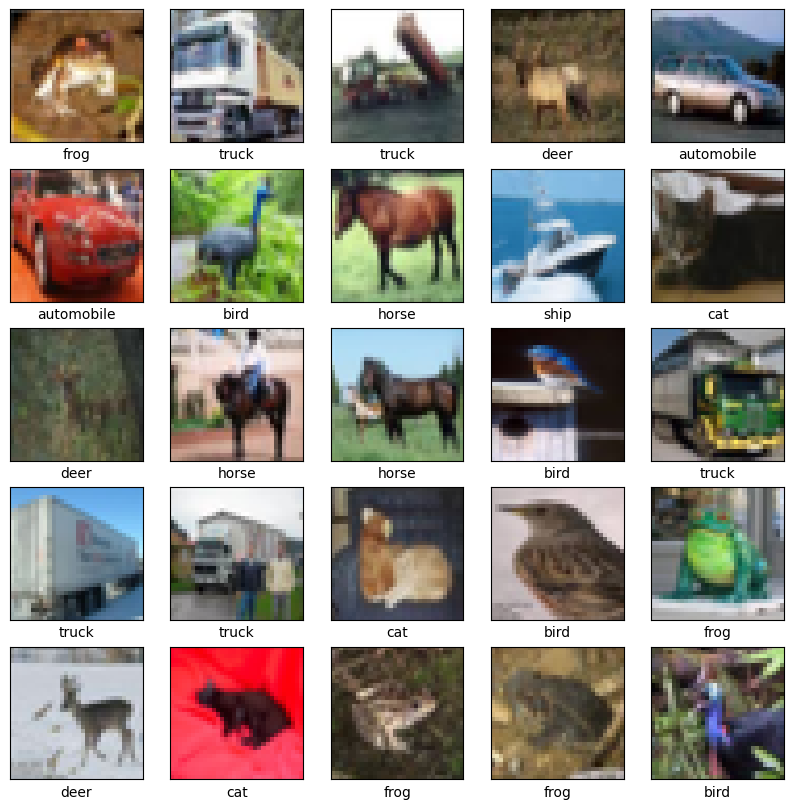

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Creating a CNN model**

We are going to create a CNN based classification model using *keras* module.

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.2049 - loss: 2.1411 - val_accuracy: 0.3381 - val_loss: 1.8604
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.3816 - loss: 1.7153 - val_accuracy: 0.4487 - val_loss: 1.5334
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.4623 - loss: 1.5019 - val_accuracy: 0.4854 - val_loss: 1.4733
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.5093 - loss: 1.3665 - val_accuracy: 0.5389 - val_loss: 1.2978
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.5441 - loss: 1.2843 - val_accuracy: 0.5323 - val_loss: 1.3114
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.5777 - loss: 1.1986 - val_accuracy: 0.5798 - val_loss: 1.1879
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6055 - loss: 1.1271 - val_accuracy: 0.6091 - val_loss: 1.1205
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6233 -

313/313 - 3s - 10ms/step - accuracy: 0.6505 - loss: 1.0105


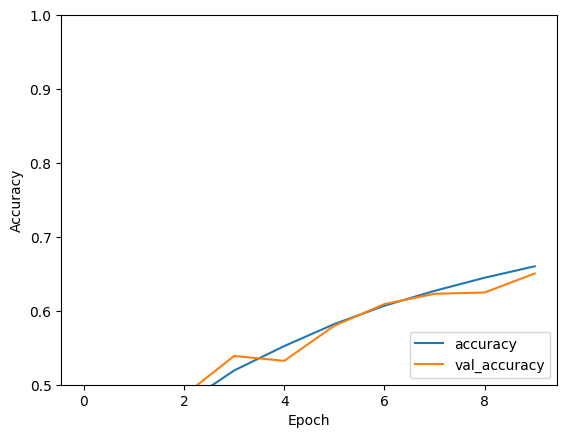

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6504999995231628


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.6240 - loss: 1.0670 - val_accuracy: 0.6459 - val_loss: 1.0075
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6819 - loss: 0.9117 - val_accuracy: 0.6826 - val_loss: 0.9162
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7266 - loss: 0.7857 - val_accuracy: 0.6933 - val_loss: 0.8846
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7574 - loss: 0.6924 - val_accuracy: 0.7013 - val_loss: 0.8905
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7811 - loss: 0.6183 - val_accuracy: 0.7052 - val_loss: 0.8881
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.8066 - loss: 0.5453 - val_accuracy: 0.6997 - val_loss: 0.9197
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.8348 - loss: 0.4749 - val_accuracy: 0.7084 - val_loss: 0.9255
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8492 -

313/313 - 3s - 10ms/step - accuracy: 0.6974 - loss: 1.1018


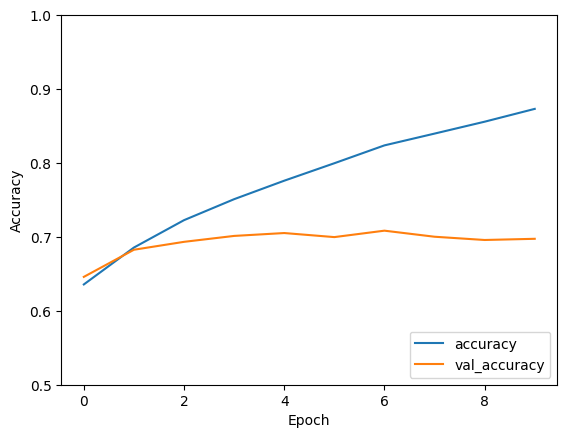

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6973999738693237


In [ ]:
# save model
model.save('final_model.keras') #previously saved as 'final_model.h5", a legacy

In [ ]:
# make a prediction for a new image.
from tensorflow.keras import preprocessing
import numpy as np

# load and prepare the image
def load_image(filename):
	# load the image
	img = preprocessing.image.load_img(filename, target_size=(32, 32))
	# convert to array
	img = preprocessing.image.img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example():
  # ⬇️ Укажите здесь пути к вашим трем изображениям
  image_paths = ['deer.jpg', 'car.jpg', 'bird.jpg', 'webots(deer).jpg']

  # Загружаем модель один раз
  model = models.load_model('final_model.keras')

  # Проходим по каждому изображению в списке
  for path in image_paths:
    print(f"--- Анализ изображения: {path} ---")

    # Загружаем и подготавливаем изображение
    img = load_image(path)

    # Предсказываем класс
    pred_list = model.predict(img)
    result = np.argmax(pred_list[0])

    # Выводим результат (предполагается, что список class_names у вас определен)
    print(f"Прогноз: {class_names[result]}\n")

# run the example
run_example()

--- Анализ изображения: deer.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Прогноз: deer

--- Анализ изображения: car.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Прогноз: automobile

--- Анализ изображения: bird.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Прогноз: bird

--- Анализ изображения: webots(deer).jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Прогноз: truck

